<a href="https://colab.research.google.com/github/djammy/DeepLearning-with-PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [ ]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data (training)',
                      4: 'making predictions and evaluating a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all together'}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.0+cu113'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get Data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We will use a linear regression formula to make a straight line with known **parameters**.

In [ ]:
# Create *known* parameters (the usual ML terminology is weight and bias)
weight = 0.7 # slope of the line
bias = 0.3 # intercept


# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
X.shape

torch.Size([50, 1])

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in ML in general)



In [ ]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they eist
    plt.scatter(test_data,predictions, c="r", s=4, label="predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

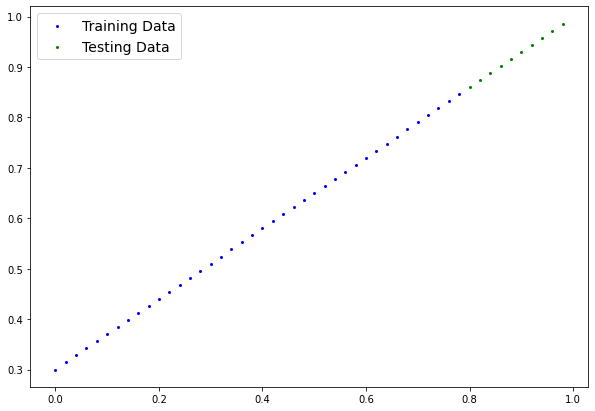

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer) to the ideal values


How does it do so?

Through two main algorithms:
1. Gradient Descent
2. Backpropagation

Watch YouTube videos from 3Blue1Brown

In [ ]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    # create two parameters: 1. weights, 2. bias
    # Instantiate them as random values to start with (equivalent to the initial guess in fitting)
    # N.B. Our created model is very simple, and therefore it is easy to initialise those parameters. In other, more complicated ones, we do not (we will look at this later on)
    # requires_grad = True means PyTorch will track the gradients of this specific parameter for use with torch.autograd and gradient descent
    # For many torch.nn modules, requires_grad = True is set by default
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    
  # Forward method to define the computation in the model: x -> Model -> y
  # The forward method defines the computation performed at every call (equivalent to **equation** in fitting algorithm)
  # N.B. You need to define a forward method if you are going to use the nn.Module
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- x is the input data whcih in our case is the trainig data
    return self.weights * x + self.bias # this is the linear regression formula

## PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graphs (another word for neural networks)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set this for us
* `torch.nn.Module` - the base class for all neural network modules, if you subclass it, you should override forward()
* `torch.optim` - this is where the optimisers in PyTorch live, they will help with gradient descent
* `def forward()` - All `nn.module` subclasses require you to overwrite `forward()``, this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we have created a model, let us see what is inside...

So we can check our model parameters or what is inside our model using `.parameters()`

In [ ]:
# Create a random seed for reproducibility
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias # in most cases you do not know the ideal values. In our case we do

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let us see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it is going to run it through the `forward()` method.

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
# Make predictions with model
# Here we could have done just this line of code: y_preds = model_0(X_test)
# The output however will contain a gradient tracker
# We use inference_mode() here because it disables gradient tracking
# With a large dataset, this step will be much faster as the model will not track the gradient
with torch.inference_mode():
  y_preds = model_0(X_test)

# with torch.no_grad():
#   y_preds = model_0(X_test) # This method has been superceded by the inference_mode()

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

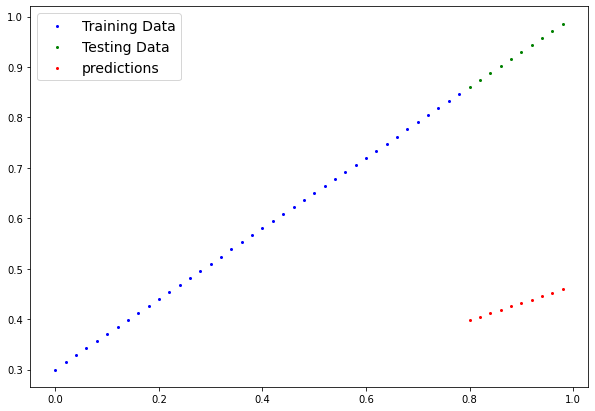

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random), to some *known* parameters.
                                                                                  
Or in other worrds from a poor representation of the data to a better representation.

One way to measure how poor or how wrong your model's predicitons are is to use a loss function

* Note: Loss function may also be called function or criterion in different areas. For our case, we are going to refer to it as the loss function

Things we need to train:

* **Loss function:** a function to measure how wrong your model's predictions are to the ideal outputs, lower is better!
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function
    - Inside the optimizer, you will often have to se two parameters:
      - `params` - the model parameters you'd like to optimize for example `params=model_0.parameters()`
      - `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small th eoptimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
# loss and optimizer functions work as a tandem, hence why we are doing them in the same block of code

# Setup a loss function
loss_fn = nn.L1Loss() # MAE = Mean Absolute Error

# Setup an optimizer (SGD - Stochastic Gradient Descent)
# If i change the parameters by a slight amount, does that reduce or increase the loss function at all?
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate: most important hyperparameter you will need

**Q:** Which loss function and optimizer should I use?

**A:** THis will be problem-specific. But with experience, you will get an idea of what works and what does not with your particular problem set.

For example, for a regression problem like ours, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you will likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training and testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions to make predicitons on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss (**back propagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data (this is a hyperparameter because we have set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop throught he data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train_mode in PyTorch sets all parameters that require gradient to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f'Loss: {loss}')

  # 3. Optimizer zero grad
  optimizer.zero_grad() # start fresh at each loop for the optimizer (efficiency of computing) otherwise the value will keep going up

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop... so we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off gradient tracking (dropout/batch norm layers)
  with torch.inference_mode(): # this turns off gradient tracking because when we test our model, we do not need to track anything
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what is happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')
  

  # Print out model state_dict()
  # print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [ ]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<L1LossBackward0>),
  tensor(0.1977, grad_fn=<L1LossBackward0>),
  tensor(0.0891, grad_fn=<L1LossBackward0>),
  tensor(0.0531, grad_fn=<L1LossBackward0>),
  tensor(0.0454, grad_fn=<L1LossBackward0>),
  tensor(0.0417, grad_fn=<L1LossBackward0>),
  tensor(0.0382, grad_fn=<L1LossBackward0>),
  tensor(0.0348, grad_fn=<L1LossBackward0>),
  tensor(0.0313, grad_fn=<L1LossBackward0>),
  tensor(0.0279, grad_fn=<L1LossBackward0>),
  tensor(0.0245, grad_fn=<L1LossBackward0>),
  tensor(0.0210, grad_fn=<L1LossBackward0>),
  tensor(0.0176, grad_fn=<L1LossBackward0>),
  tensor(0.0142, grad_fn=<L1LossBackward0>),
  tensor(0.0107, grad_fn=<L1LossBackward0>),
  tensor(0.0073, grad_fn=<L1LossBackward0>),
  tensor(0.0039, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>),
  tensor(0.0089, grad_fn=<L1LossBackward0>),
  tensor(0.0089

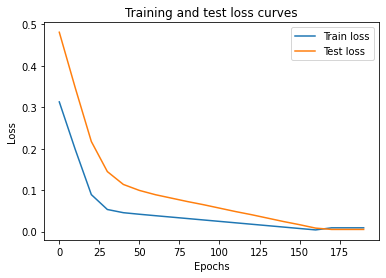

In [ ]:
import numpy as np
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

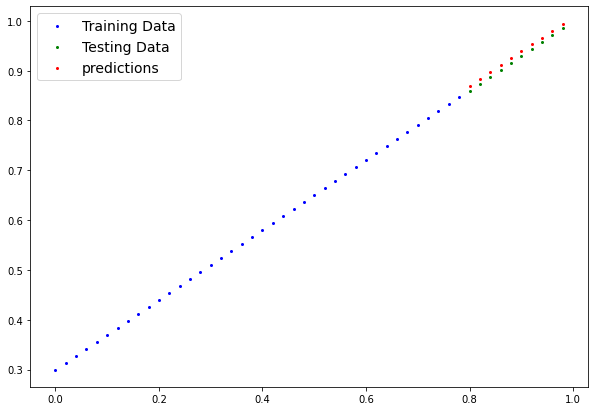

In [ ]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main method you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models' directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1063 Aug 11 13:00 01_pytorch_workflow_model_0.pth


## Loading a PyTOrch model

Since we saved our model's `state_dict()` rather than the entire model, we will create a new instance of our model class and load the save `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_0 (this will update the new instance with the updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

## 6. Putting it all together

Let us go back to the steps above and see it all in one place

In [ ]:
# Import PyTorch and matplotlib

import torch
from torch import nn 
import matplotlib.pyplot as plt
import numpy as np

# Check torch version
torch.__version__

'1.12.0+cu113'

Create device agnostic code.

This meansif we have got access to a GPU, our code will use it for potentially faster computing.

If no GPU is available, the code will default to using CPU.

In [ ]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels respectively)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze(), errors will pop up
y = weight *X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f'X_train length = {len(X_train)}, y_train length = {len(y_train)}, X_test length = {len(X_test)}, y_test length = {len(y_test)}')

X_train length = 40, y_train length = 40, X_test length = 10, y_test length = 10


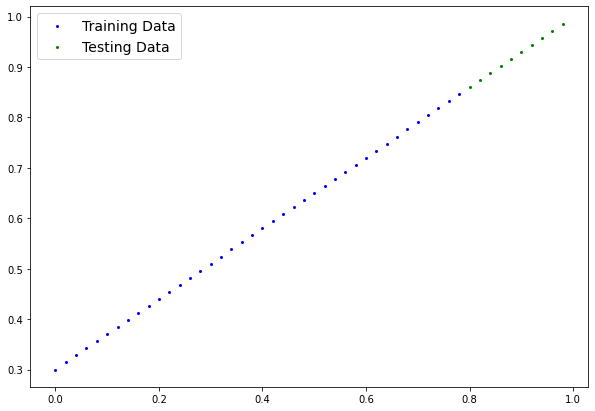

In [ ]:
# Plot the data
# Note: if you do not have the plot_predictions() function loaded up, this will give error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters (nn refers to neural networks) / also called: linear transform, probing layer, fully connected layer, dense layer (in Tensorflow)...
    # in the earlier example,w e initialised the weight and bias randomly. PyTorch has a way to do this automatically 
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1) # 1 value of X maps to 1 value of y, hence 1, 1
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Train the model

In [ ]:
# Set up the loss function
loss_fn = nn.L1Loss() # MAE

# Set up our optimizer (Stochastic Gradient Descent SGD)
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# Let us write a training loop
torch.manual_seed(42)

epochs = 200

# Device agnostic code for data (put data on the target device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  # 0. set model in training mode
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

  test_loss = loss_fn(test_pred, y_test)

  # Print out what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

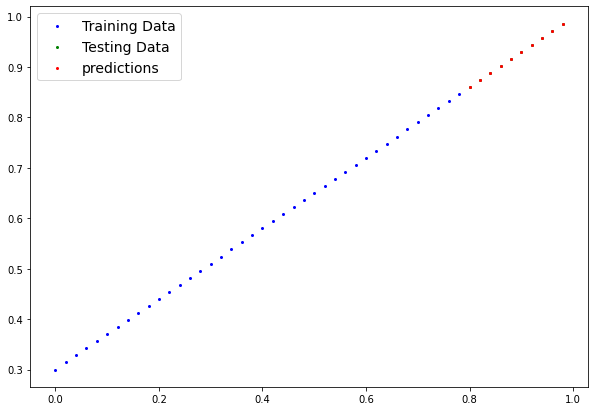

In [ ]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & Loading a trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH /  MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises & Extra-curriculum

refer to: github repo